In [1]:
## Importing needed packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data

#For plotting Gaussian
from scipy.optimize import curve_fit
from astropy import modeling
from scipy.stats import norm
import math
import seaborn as sns
from scipy.signal import find_peaks
import scipy.stats as stats
import scipy.stats
from scipy import ndimage



In [2]:
location = "/Users/RuheeJanmohamed/Desktop/Data/co_zero_north.fits"

hdul = fits.open(location)

hdu_zero_north = hdul[0]

co_zero_north = hdu_zero_north.data

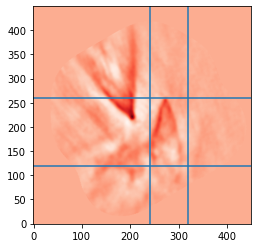

In [3]:
im_rot = ndimage.rotate(co_zero_north, angle=-30,reshape=False)

plt.imshow(im_rot,cmap='Reds',origin='lower')

plt.axvline(240) 
plt.axvline(320) 
plt.axhline(260)
plt.axhline(120)

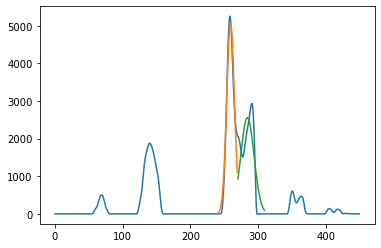

In [4]:
cut = im_rot[200:210,:]
cut[cut<0]=0
avg_cut = np.mean(cut,axis=0)

plt.plot(range(450),avg_cut)
 
def Gauss(x,amp,mean,sigma):
    f = amp*np.exp(-(x-mean)**2/(2*sigma**2))
    return f
    
xdata=np.arange(240,270)
ydata=avg_cut[240:270]

p0 = (np.max(ydata),xdata[np.argmax(ydata)],5)

p_opt,p_cov = curve_fit(Gauss,xdata,ydata,p0)
plt.plot(xdata,Gauss(xdata,p_opt[0],p_opt[1],p_opt[2]))

x2data=np.arange(270,310)
y2data=avg_cut[270:310]

p0 = (np.max(y2data),x2data[np.argmax(y2data)],5)

p_opt,p_cov = curve_fit(Gauss,x2data,y2data,p0)
plt.plot(x2data,Gauss(x2data,p_opt[0],p_opt[1],p_opt[2]))


## Left Hand Gaussian Loop

In [5]:
ycut_list=[(120+(i*5),120+((i+1)*5)) for i in range(26)]

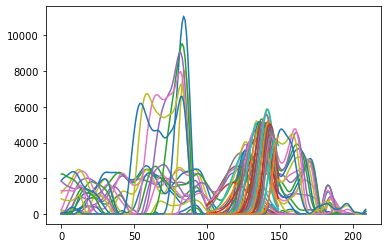

In [15]:
Model_Values = open("SecondaryNorth_LeftHand_Model_Values.txt", "w")

Model_Values.write("Left Hand Gaussian \n")
Model_Values.write("y_cut\tfit_pk\tfit_x\tfit_s\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c\tpk_c\n")

offset_x1 = 119
offset_x2 = 320


for ycut in ycut_list:
    cut = im_rot[ycut[0]:ycut[1],120:330] 
    cut[cut<0]=0
    avg_cut = np.mean(cut,axis=0)
    xdata=np.arange(100,150)
    idata=avg_cut[100:150]
    
    p0 = (np.max(idata),xdata[np.argmax(idata)],5)

    p_opt,p_cov = curve_fit(Gauss,xdata,idata,p0,maxfev=80000)
    
    plt.plot(range(210),avg_cut)
    plt.plot(xdata,Gauss(xdata,p_opt[0],p_opt[1],p_opt[2]))
    
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut))
    Model_Values.write("%f\t%f\t%f\t" % (p_opt[0],p_opt[1] + offset_x1,p_opt[2]))
    Model_Values.write("%f\t%f\t%f\t" % (Err[0],Err[1],Err[2]))
    Model_Values.write("%f\t" % (xdata[idata==np.max(idata)]+offset_x1))
    Model_Values.write("%f\t" % np.max(idata))
    Model_Values.write("\n")
    

Model_Values.close()


In [16]:
ycut_left, xfit_left = np.genfromtxt("SecondaryNorth_LeftHand_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])

print(xfit_left)

[248.906661 248.466851 248.42161  248.164313 245.374249 242.60218
 237.31769  239.715334 242.355035 245.983062 251.905989 254.673474
 253.16929  252.879687 253.639352 255.473968 257.418781 258.780481
 259.788017 260.594914 261.313686 262.263814 263.023692 263.865076
 266.144698 268.05523 ]


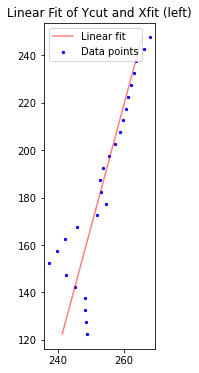

0.1931946178461537


In [17]:
fit = np.polyfit(ycut_left, xfit_left,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_left + intercept

fig = plt.figure(figsize=[2,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_left,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_left, ycut_left,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (left)')
ax.legend()
plt.show()

print(ang_coeff)

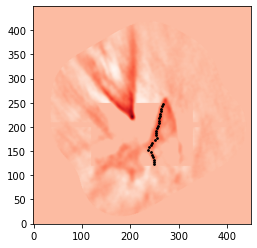

In [18]:
plt.imshow(im_rot,cmap='Reds',origin='lower')
plt.scatter(xfit_left, ycut_left, s=3, c='k')
ax.plot(ycut_left, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')

## Right Hand Gaussian

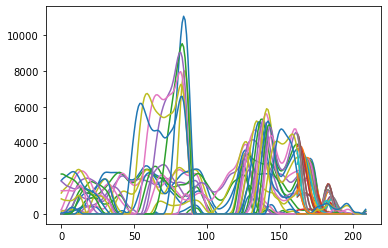

In [19]:
Model_Values = open("SecondaryNorth_RightHand_Model_Values.txt", "w")

Model_Values.write("Right Hand Gaussian \n")
Model_Values.write("y_cut\tfit_pk\tfit_x\tfit_s\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c\tpk_c\n")

offset_x1 = 120
offset_x2 = 320


for ycut in ycut_list:
    cut = im_rot[ycut[0]:ycut[1],120:330] 
    cut[cut<0]=0
    avg_cut = np.mean(cut,axis=0)
    xdata=np.arange(162,200)
    idata=avg_cut[162:200]
    
    p0 = (np.max(idata),xdata[np.argmax(idata)],5)

    p_opt,p_cov = curve_fit(Gauss,xdata,idata,p0,maxfev=800000)
    
    plt.plot(range(210),avg_cut)
    plt.plot(xdata,Gauss(xdata,p_opt[0],p_opt[1],p_opt[2]))
    
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut))
    Model_Values.write("%f\t%f\t%f\t" % (p_opt[0],p_opt[1] + offset_x1,p_opt[2]))
    Model_Values.write("%f\t%f\t%f\t" % (Err[0],Err[1],Err[2]))
    Model_Values.write("%f\t" % (xdata[idata==np.max(idata)]+offset_x1))
    Model_Values.write("%f\t" % np.max(idata))
    Model_Values.write("\n")
    

Model_Values.close()


In [20]:
ycut_right, xfit_right = np.genfromtxt("SecondaryNorth_RightHand_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])



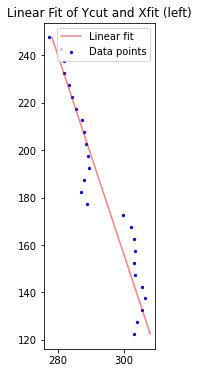

-0.24024366618803417


In [21]:
fit = np.polyfit(ycut_right, xfit_right,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_right + intercept

fig = plt.figure(figsize=[2,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_right,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_right, ycut_right,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (left)')
ax.legend()
plt.show()

print(ang_coeff)

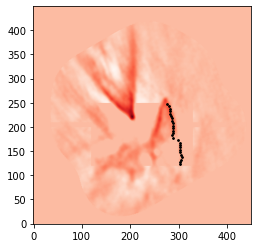

In [22]:
plt.imshow(im_rot,cmap='Reds',origin='lower')
plt.scatter(xfit_right, ycut_right, s=3, c='k')
ax.plot(ycut_right, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')

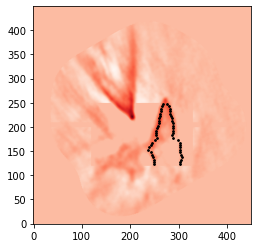

In [23]:
plt.imshow(im_rot,cmap='Reds',origin='lower')
plt.scatter(xfit_right, ycut_right, s=3, c='k')
ax.plot(ycut_right, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
plt.scatter(xfit_left, ycut_left, s=3, c='k')
ax.plot(ycut_left, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
plt.savefig('Northern_Secondary_Gaussian.pdf')